### 1. This modolue is to figure out how to run the segmentation for the video and laod the packages

1. pip install stardist: https://pypi.org/project/stardist/
2. pip install tensorflow: https://www.tensorflow.org/install/pip
3. please be noted to install the specify tensorflow and pytorch version that work with the same compatible cuda
4. This code will take memory to save the segmented volumne for each frame as h5 -->

In [1]:
import sys
# from Segmentation import *
from Segmentation.Video_seg import *

2024-03-27 13:23:05.462890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


True
Tesla P100-PCIE-12GB
True
2.13.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


#### 2. Load the model for 3D segmentation

In [2]:
model_weights_path = '/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/model_weights/weights_best_42stacks_all.h5'
model, model_2D = load_model_3D_and_2D(model_weights_path)

use_gpu:  True


base_model.py (149): output path for model already exists, files may be overwritten: /work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/models/stardist
2024-03-27 13:23:16.173113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 223 MB memory:  -> device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:03:00.0, compute capability: 6.0
2024-03-27 13:23:16.195205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 223.62MiB (234487808 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


Using default values: prob_thresh=0.5, nms_thresh=0.4.
There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


#### 3. Run Segmentation for the video and Please specify the arguments: 

'load_path': the folder to load the original h5 file \
'save_folder: the folder to save segmentation file  \
'ch: the channel index used for tracking \
'zoom_factor': for low resolution zoom_factor = 2, staticfluild use zoom_factor = 1 \
'start_idx': the starting time index \
'end_idx': the ending time index \

In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [4]:
load_folder = '/work/venkatachalamlab/Hang/GNN_matching_git/dataset/ZM9624/'
save_folder = 'seg'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    


In [8]:
img_shape = get_img_shape(load_folder)
[ch, zoom_factor] = [1,2]
# for t_idx in tqdm(range(img_shape[0])):
# for t_idx in tqdm(range(2)):
#     label_z = get_frame_segmentation(model,model_2D,t_idx, ch, zoom_factor,load_folder)
#     # label[t_idx,0] = label_z
#     save_var_h5('seg/'+str(t_idx)+'.h5',[label_z],['label'])
# print("finish the segmentation of movie in the folder path: ", save_folder)

  0%|          | 0/2 [00:00<?, ?it/s]2024-03-27 13:59:35.517074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 13:59:35.517838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 13:59:35.518539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 13:59:35.519258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 13:59:35.519963: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memor

NotFoundError: Graph execution error:

Detected at node 'model_1/conv2d/Relu' defined at (most recent call last):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31497/128668952.py", line 4, in <module>
      label_z = get_frame_segmentation(model,model_2D,t_idx, ch, zoom_factor,load_folder)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 119, in get_frame_segmentation
      img_proj_pred = get_mask_from_proj_pred(model_2D,img_zoom)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 111, in get_mask_from_proj_pred
      img_proj_pred,_ = model_2D.predict_instances(img_proj_norm)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 777, in predict_instances
      for r in self._predict_instances_generator(*args, **kwargs):
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 729, in _predict_instances_generator
      for res in self._predict_sparse_generator(img, axes=axes, normalizer=normalizer, n_tiles=n_tiles,
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 592, in _predict_sparse_generator
      results = predict_direct(x)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 398, in predict_direct
      ys = self.keras_model.predict(x[np.newaxis], **predict_kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model_1/conv2d/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node model_1/conv2d/Relu}}]] [Op:__inference_predict_function_1365]

In [14]:
folder_path = load_folder
t_idx = 0
img_original,mask = get_volume_at_frame(folder_path+'data.h5',t_idx)
img_zoom = scipy.ndimage.zoom(img_original[0,ch],[1,zoom_factor,zoom_factor],order = 0)
img_norm = normalize(img_zoom, 1,99.8)
img_proj =  np.max(img_zoom,axis = 0)
img_proj_norm = normalize(img_proj)

In [23]:
img_proj_pred,_ = model_2D.predict_instances(img_proj_norm)

2024-03-27 14:11:08.392995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:08.394011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:08.394996: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:08.395957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:08.396913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:08.397870: I tenso

NotFoundError: Graph execution error:

Detected at node 'model_1/conv2d/Relu' defined at (most recent call last):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31497/128668952.py", line 4, in <module>
      label_z = get_frame_segmentation(model,model_2D,t_idx, ch, zoom_factor,load_folder)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 119, in get_frame_segmentation
      img_proj_pred = get_mask_from_proj_pred(model_2D,img_zoom)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 111, in get_mask_from_proj_pred
      img_proj_pred,_ = model_2D.predict_instances(img_proj_norm)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 777, in predict_instances
      for r in self._predict_instances_generator(*args, **kwargs):
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 729, in _predict_instances_generator
      for res in self._predict_sparse_generator(img, axes=axes, normalizer=normalizer, n_tiles=n_tiles,
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 592, in _predict_sparse_generator
      results = predict_direct(x)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 398, in predict_direct
      ys = self.keras_model.predict(x[np.newaxis], **predict_kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model_1/conv2d/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node model_1/conv2d/Relu}}]] [Op:__inference_predict_function_1365]

In [25]:
model_2D.predict_instances(img_norm[0])

2024-03-27 14:11:30.703046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:30.704408: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:30.705502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:30.706582: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:30.707671: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:11:30.708705: I tenso

NotFoundError: Graph execution error:

Detected at node 'model_1/conv2d/Relu' defined at (most recent call last):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31497/128668952.py", line 4, in <module>
      label_z = get_frame_segmentation(model,model_2D,t_idx, ch, zoom_factor,load_folder)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 119, in get_frame_segmentation
      img_proj_pred = get_mask_from_proj_pred(model_2D,img_zoom)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 111, in get_mask_from_proj_pred
      img_proj_pred,_ = model_2D.predict_instances(img_proj_norm)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 777, in predict_instances
      for r in self._predict_instances_generator(*args, **kwargs):
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 729, in _predict_instances_generator
      for res in self._predict_sparse_generator(img, axes=axes, normalizer=normalizer, n_tiles=n_tiles,
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 592, in _predict_sparse_generator
      results = predict_direct(x)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 398, in predict_direct
      ys = self.keras_model.predict(x[np.newaxis], **predict_kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model_1/conv2d/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node model_1/conv2d/Relu}}]] [Op:__inference_predict_function_1365]

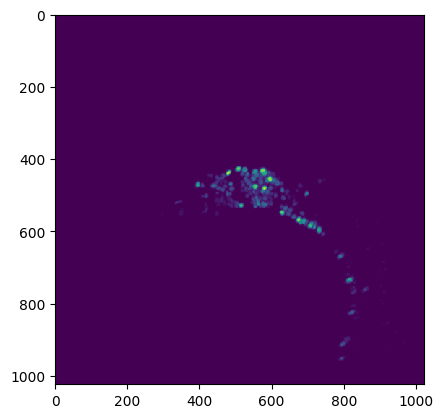

In [19]:
plt.imshow(img_proj_norm)
plt.show()

In [13]:
img_proj_pred = get_mask_from_proj_pred(model_2D,img_zoom)

2024-03-27 14:05:44.456906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:05:44.457910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:05:44.458645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:05:44.459345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:05:44.460049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:753] failed to allocate 22.36MiB (23448576 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2024-03-27 14:05:44.460756: I tenso

NotFoundError: Graph execution error:

Detected at node 'model_1/conv2d/Relu' defined at (most recent call last):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/hangdeng/.conda/envs/deeplearning-cuda11_8/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_31497/128668952.py", line 4, in <module>
      label_z = get_frame_segmentation(model,model_2D,t_idx, ch, zoom_factor,load_folder)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 119, in get_frame_segmentation
      img_proj_pred = get_mask_from_proj_pred(model_2D,img_zoom)
    File "/work/venkatachalamlab/Hang/GNN_matching_git/code/GNN_match/Segmentation/Video_seg.py", line 111, in get_mask_from_proj_pred
      img_proj_pred,_ = model_2D.predict_instances(img_proj_norm)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 777, in predict_instances
      for r in self._predict_instances_generator(*args, **kwargs):
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 729, in _predict_instances_generator
      for res in self._predict_sparse_generator(img, axes=axes, normalizer=normalizer, n_tiles=n_tiles,
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 592, in _predict_sparse_generator
      results = predict_direct(x)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/stardist/models/base.py", line 398, in predict_direct
      ys = self.keras_model.predict(x[np.newaxis], **predict_kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/hangdeng/.local/lib/python3.9/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model_1/conv2d/Relu'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine eng11{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
  Profiling failure on CUDNN engine eng0{}: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 16777216 bytes.
	 [[{{node model_1/conv2d/Relu}}]] [Op:__inference_predict_function_1365]

In [ ]:
pred, _ = model.predict_instances(img_norm*((img_proj_pred>0)), n_tiles=model._guess_n_tiles(img_norm), show_tile_progress=False)
label_z = scipy.ndimage.zoom(pred,[1,1/zoom_factor,1/zoom_factor],order = 0)

#### 4. The following version could run the above in parallel, needs to specify the memory

In [9]:
# if __name__ == "__main__":
#     # Define the range of iterations you want to process in parallel
#     img_shape = get_img_shape(load_folder)
#     [ch, zoom_factor] = [1,2] ## (for low resolution zoom_factor = 2, staticfluild use zoom_factor = 1)
#     start_idx = 0  ## starting time index
#     # end_idx = img_shape[0]   ## end time index
#     end_idx = 2   

#     # Create a ThreadPoolExecutor for parallel processing
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # Use partial to create a function with fixed arguments (img_shape, model, model_2D, ch, zoom_factor, save_folder)
#         process_partial = partial(process_iteration,  model=model, model_2D=model_2D, ch=ch, zoom_factor=zoom_factor, 
#                                   load_folder=load_folder, save_folder=save_folder)

#         # Iterate and process in parallel using the ThreadPoolExecutor
#         tqdm_parallel = tqdm(range(start_idx, end_idx, 1))
#         # tqdm_parallel = tqdm(not_exits)
#         results = list(executor.map(process_partial, tqdm_parallel))

#     # Print the results (t_idx values)
#     print("Processed t_idx values:", results)